In [1]:
%matplotlib inline


# Seam Carving


This example demonstrates how images can be resized using seam carving [1]_.
Resizing to a new aspect ratio distorts image contents. Seam carving attempts
to resize *without* distortion, by removing regions of an image which are less
important. In this example we are using the Sobel filter to signify the
importance of each pixel.

.. [1] Shai Avidan and Ariel Shamir
       "Seam Carving for Content-Aware Image Resizing"
       http://www.cs.jhu.edu/~misha/ReadingSeminar/Papers/Avidan07.pdf




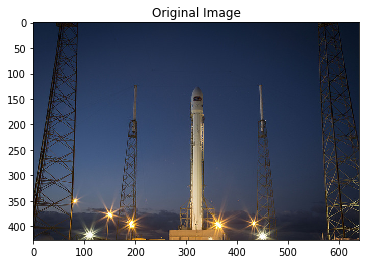

In [2]:
from skimage import data, draw
from skimage import transform, util
import numpy as np
from skimage import filters, color
from matplotlib import pyplot as plt


hl_color = np.array([0, 1, 0])

img = data.rocket()
img = util.img_as_float(img)
eimg = filters.sobel(color.rgb2gray(img))

plt.title('Original Image')
plt.imshow(img)

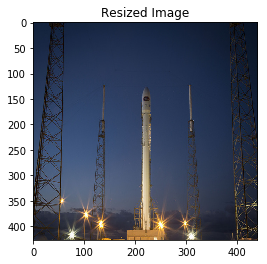

In [3]:
resized = transform.resize(img, (img.shape[0], img.shape[1] - 200),
                           mode='reflect')
plt.figure()
plt.title('Resized Image')
plt.imshow(resized)

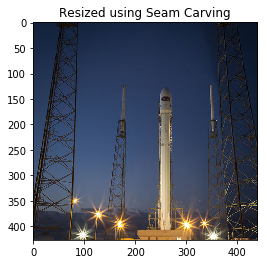

In [4]:
out = transform.seam_carve(img, eimg, 'vertical', 200)
plt.figure()
plt.title('Resized using Seam Carving')
plt.imshow(out)

Resizing distorts the rocket and surrounding objects, whereas seam carving
removes empty spaces and preserves object proportions.

Object Removal
--------------

Seam carving can also be used to remove artifacts from images. This
requires weighting the artifact with low values. Recall lower weights are
preferentially removed in seam carving. The following code masks the
rocket's region with low weights, indicating it should be removed.



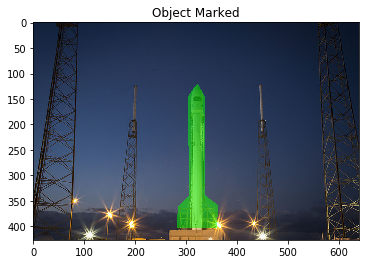

In [5]:
masked_img = img.copy()

poly = [(404, 281), (404, 360), (359, 364), (338, 337), (145, 337), (120, 322),
        (145, 304), (340, 306), (362, 284)]
pr = np.array([p[0] for p in poly])
pc = np.array([p[1] for p in poly])
rr, cc = draw.polygon(pr, pc)

masked_img[rr, cc, :] = masked_img[rr, cc, :]*0.5 + hl_color*.5
plt.figure()
plt.title('Object Marked')

plt.imshow(masked_img)

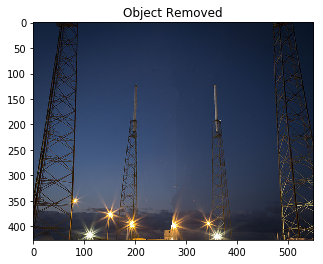

In [6]:
eimg[rr, cc] -= 1000

plt.figure()
plt.title('Object Removed')
out = transform.seam_carve(img, eimg, 'vertical', 90)
resized = transform.resize(img, out.shape, mode='reflect')
plt.imshow(out)
plt.show()